# Explorando as despesas da educação na cidade de São Paulo

*Um tutorial de primeiros passos para acessar a execução orçamentária da Secretaria de Educação do município usando Python e a biblioteca de análise de dados Pandas* *

## Passo 1. Cadastro na API e token de acesso

* Acessar a Vitrine de APIs da Prodam:https://api.prodam.sp.gov.br/store/
* Selecione a API do SOF
* Clique em "Inscrever-se"
* Acesse o menu "Minhas assinaturas"
* Gere uma chave de acesso de produção; coloque um valor de validade negativo, para evitar que expire
* Copie o Token de Acesso

## Passo 2. Teste na API Console

A API Console (entre na aba com esse nome neste link [aqui](https://api.prodam.sp.gov.br/store/apis/info?name=SOF&version=v2.1.0&provider=admin)) é uma interface que permite testar as diferentes consultas e obter a URL com os parâmetros desejados. Por exemplo, se deseja obter todos os contratos da Secretaria de Educação em 2017, basta entrar no item **/consultaContrato** e informar "2017" no campo **anoContrato** e "16" (código da Educação) no campo **codOrgao**. A URL resultante dessa consulta e que você vai usar nos passos seguintes é https://gatewayapi.prodam.sp.gov.br:443/financas/orcamento/sof/v2.1.0/consultaContrato?anoContrato=2017&codOrgao=16  

## Passo 3. Mãos ao Pandas!

Este é o script que consulta a API (para qualquer URL gerada acima) e transforma o arquivo obtido em formato json para um Data Frame do Pandas, a partir do qual será possível fazer as análises. Substitua a constante TOKEN pelo seu código de assinatura!

In [2]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

In [39]:
TOKEN = '198f959a5f39a1c441c7c863423264'

base_url = "https://gatewayapi.prodam.sp.gov.br:443/financas/orcamento/sof/v2.1.0"

headers={'Authorization' : str('Bearer ' + TOKEN)}

anos = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

#Anos desejados na consulta; é possível consultar informações a partir de 2003

## Orçamento 

Primeiro, vamos ter uma visão geral do que foi orçado para a Secretaria Municipal de Educação desde 2011 até o ano corrente, bem como os valores congelados e já executados. Isso é possível com a consulta "Despesas"

In [5]:
df_lista = []
a = 0 

for ano in anos:
    """consulta todos os anos da lista acima"""
    
    url_orcado = '{base_url}/consultarDespesas?anoDotacao={ano}&mesDotacao=12&codOrgao=16'.format(base_url=base_url, ano=ano)
    request_orcado = requests.get(url_orcado,
                                headers=headers,
                                verify=True).json()
    
    df_orcado = pd.DataFrame(request_orcado['lstDespesas'])
    df_lista.append(df_orcado)
    df_lista[a].loc[:,'anoExercicio'] = str(ano)
    #adiciona uma coluna com o ano de exercício, já que esta informação não vem na API
    a += 1

df_total = pd.concat(df_lista, axis=0, ignore_index=True)

In [6]:
df_total

,valAnuladoEmpenho,valCanceladoReserva,valCongelado,valDescongelado,valDisponivel,valEmpenhadoLiquido,valLiquidado,valOrcadoAtualizado,valOrcadoInicial,valPagoExercicio,valPagoRestos,valReduzido,valReservado,valReservadoLiquido,valSuplementado,valTotalEmpenhado,anoExercicio
0,4.414630e+08,1.247965e+09,1.937554e+09,1.715061e+09,6.984083e+09,6.826925e+09,6.210634e+09,7.206576e+09,6978389021,6.169191e+09,5.588442e+08,1.220404e+09,8.074884e+09,6.826919e+09,1.448590e+09,7.268388e+09,2011
1,3.916890e+08,1.256692e+09,1.850602e+09,1.694680e+09,7.520123e+09,7.406758e+09,6.997171e+09,7.676046e+09,7307184447,6.948630e+09,3.427918e+08,9.094071e+08,8.663449e+09,7.406758e+09,1.278269e+09,7.798447e+09,2012
2,7.262321e+08,1.310143e+09,1.066800e+07,1.423000e+06,8.280234e+09,7.939771e+09,7.595840e+09,8.289479e+09,7914456075,7.568847e+09,2.841143e+08,5.991833e+08,9.249913e+09,7.939771e+09,9.742067e+08,8.666003e+09,2013
3,4.201673e+08,1.252968e+09,1.244632e+09,8.673022e+08,8.983922e+09,8.799911e+09,8.417624e+09,9.361252e+09,9022636700,8.399880e+09,2.467169e+08,1.158271e+09,1.005287e+10,8.799905e+09,1.496886e+09,9.220079e+09,2014
4,6.408370e+08,1.428246e+09,1.114940e+09,9.182910e+08,9.802778e+09,9.709032e+09,9.207102e+09,9.999427e+09,9792348985,9.178274e+09,3.829664e+08,1.240442e+09,1.113728e+10,9.709032e+09,1.447520e+09,1.034987e+10,2015
5,7.566030e+08,1.246995e+09,1.745198e+09,1.051613e+09,1.045215e+10,1.024287e+10,9.890627e+09,1.114573e+10,11096151037,9.865022e+09,3.022515e+08,5.583677e+08,1.148986e+10,1.024287e+10,6.079500e+08,1.099947e+10,2016
6,2.272048e+09,3.460240e+09,3.720131e+09,3.558954e+09,1.104829e+10,1.069421e+10,1.023613e+10,1.120947e+10,10985422304,1.019775e+10,2.811021e+08,8.743850e+08,1.415445e+10,1.069421e+10,1.098430e+09,1.296626e+10,2017
7,3.921755e+08,6.206129e+08,1.383712e+09,2.125405e+08,1.062097e+10,3.779975e+09,2.206465e+09,1.179214e+10,11774780638,2.129934e+09,0.000000e+00,5.848946e+07,5.012304e+09,4.391691e+09,7.584808e+07,4.172151e+09,2018


Uma visão dos valores orçados (valor atualizado no início do ano, após projeção mais adequada das receitas) e o liquidado, nos últimos meses do ano:

In [7]:
series = df_total[['anoExercicio', 'valOrcadoAtualizado','valLiquidado']].set_index('anoExercicio')

In [8]:
series = series[['valOrcadoAtualizado', 'valLiquidado']].divide(1000000000)

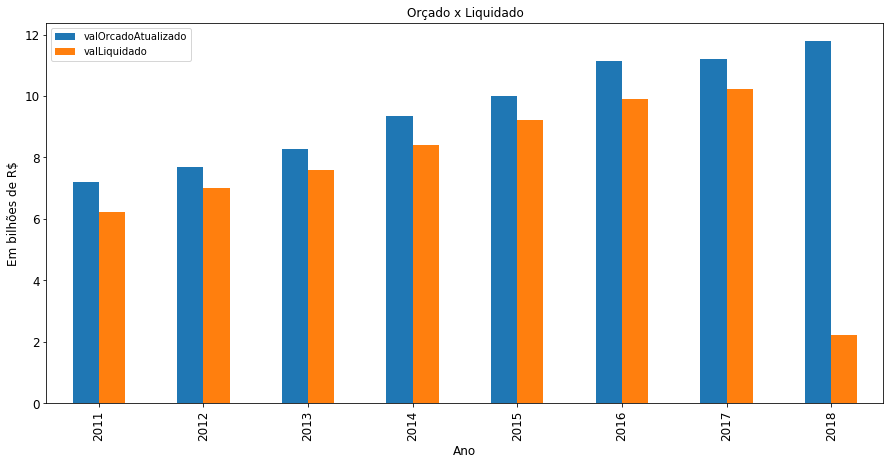

In [9]:
grafico1 = series[['valOrcadoAtualizado','valLiquidado']].plot(kind='bar', title ="Orçado x Liquidado", figsize=(15, 7), legend=True, fontsize=12)

grafico1.set_xlabel("Ano", fontsize=12)

grafico1.set_ylabel("Em bilhões de R$", fontsize=12)

plt.show(grafico1)

## Empenhos

Empenho é o ato em que autoridade verifica a existência do crédito orçamentário e autoriza a execução da despesa (por exemplo, para realizar uma licitação). A partir daí, os valores vão sendo liquidados e pagos conforme a execução de um contrato. 

A API fornece apenas uma página na consulta. O script abaixo checa a quantidade de páginas nos metadados da consulta e itera o número de vezes necessário para obter todas as páginas.

### Opção 1. Um ano inteiro

Vamos ver quanto a Secretaria Municipal de Educação empenhou de seu orçamento em 2017.

In [20]:
pagination = '&numPagina={PAGE}'
ano_empenho = 2017

In [ ]:
request_empenhos = requests.get('{base_url}/consultaEmpenhos?anoEmpenho={ano}&mesEmpenho=12&codOrgao=16'.format(base_url=base_url, ano=ano_empenho), 
                                            headers=headers, verify=True).json()
    
    number_of_pages = request_empenhos['metadados']['qtdPaginas']

    todos_empenhos = []
    
    todos_empenhos = todos_empenhos + request_empenhos['lstEmpenhos']
    
    if number_of_pages>1:
        
        for p in range(2, number_of_pages+1):
            
            request_empenhos = requests.get('{base_url}/consultaEmpenhos?anoEmpenho={ano}&mesEmpenho=12&codOrgao=16'.format(base_url=base_url, ano=ano_empenho) + pagination.format(PAGE=p), 
                                            headers=headers, verify=True).json()
            
            todos_empenhos = todos_empenhos + request_empenhos['lstEmpenhos']
            
df_empenhos = pd.DataFrame(todos_empenhos)

### Opção 2. Série Histórica

In [4]:
pagination = '&numPagina={PAGE}'

**Atenção: as consultas podem demorar horas, a depender da quantidade de anos requerida; verifique se o número de anos acima é realmente necessário; faça apenas isso uma vez, e guarde a base para análises futuras **

In [40]:
df_empenhos_lista = []

for ano in anos:

    request_empenhos = requests.get('{base_url}/consultaEmpenhos?anoEmpenho={ano}&mesEmpenho=12&codOrgao=16'.format(base_url=base_url, ano=ano), 
                                            headers=headers, verify=True).json()
    
    number_of_pages = request_empenhos['metadados']['qtdPaginas']

    todos_empenhos = []
    
    todos_empenhos = todos_empenhos + request_empenhos['lstEmpenhos']
    
    if number_of_pages>1:
        
        for p in range(2, number_of_pages+1):
            
            request_empenhos = requests.get('{base_url}/consultaEmpenhos?anoEmpenho={ano}&mesEmpenho=12&codOrgao=16'.format(base_url=base_url, ano=ano) + pagination.format(PAGE=p), 
                                            headers=headers, verify=True).json()
            
            todos_empenhos = todos_empenhos + request_empenhos['lstEmpenhos']
            
    df_empenhos = pd.DataFrame(todos_empenhos)
    
    df_empenhos_lista.append(df_empenhos)

df_empenhos_serie = pd.concat(df_empenhos_lista, ignore_index=True)

In [41]:
df_empenhos_serie.columns

Index(['anoEmpenho', 'codCategoria', 'codElemento', 'codEmpenho', 'codEmpresa',
       'codFonteRecurso', 'codFuncao', 'codGrupo', 'codItemDespesa',
       'codModalidade', 'codOrgao', 'codPrograma', 'codProjetoAtividade',
       'codSubElemento', 'codSubFuncao', 'codUnidade', 'datEmpenho',
       'mesEmpenho', 'nomEmpresa', 'numCpfCnpj', 'numReserva',
       'txtCategoriaEconomica', 'txtDescricaoElemento',
       'txtDescricaoFonteRecurso', 'txtDescricaoFuncao',
       'txtDescricaoItemDespesa', 'txtDescricaoOrgao', 'txtDescricaoPrograma',
       'txtDescricaoProjetoAtividade', 'txtDescricaoSubElemento',
       'txtDescricaoSubFuncao', 'txtDescricaoUnidade', 'txtGrupoDespesa',
       'txtModalidadeAplicacao', 'txtRazaoSocial', 'valAnuladoEmpenho',
       'valEmpenhadoLiquido', 'valLiquidado', 'valPagoExercicio',
       'valPagoRestos', 'valTotalEmpenhado'],
      dtype='object')

Com os passos acima, fizemos a requisição de todas as páginas e convertemos o arquivo formato json em um DataFrame. Agora podemos trabalhar com a análise desses dado no Pandas. Para checar quantos registros existentes, vamos ver o final da lista (aqui havia apenas 2016-2017):

In [42]:
df_empenhos_serie.tail()

,anoEmpenho,codCategoria,codElemento,codEmpenho,codEmpresa,codFonteRecurso,codFuncao,codGrupo,codItemDespesa,codModalidade,...,txtDescricaoUnidade,txtGrupoDespesa,txtModalidadeAplicacao,txtRazaoSocial,valAnuladoEmpenho,valEmpenhadoLiquido,valLiquidado,valPagoExercicio,valPagoRestos,valTotalEmpenhado
115242,2017,3,39,65602,01,00,12,3,99,90,...,Departamento de Alimentação Escolar,Outras Despesas Correntes,Aplicações Diretas,BICIEXTIL EXTINTORES EIRELI EPP,0.0,548.00,548.00,548.00,0.0,548.00
115243,2017,3,39,9857,01,00,12,3,99,90,...,Departamento de Alimentação Escolar,Outras Despesas Correntes,Aplicações Diretas,BG COMERCIO DE BALANÇAS LTDA - EPP,0.0,2954.68,2954.68,2954.68,0.0,2954.68
115244,2017,3,39,9863,01,00,12,3,99,90,...,Departamento de Alimentação Escolar,Outras Despesas Correntes,Aplicações Diretas,BG COMERCIO DE BALANÇAS LTDA - EPP,0.0,229.68,229.68,229.68,0.0,229.68
115245,2017,3,39,13108,01,00,12,3,99,90,...,Departamento de Alimentação Escolar,Outras Despesas Correntes,Aplicações Diretas,DIGIDOK3 DIGITALIZAÇÃO E SERVIÇOS LTDA - EPP,0.0,8610.86,8610.86,8610.86,0.0,8610.86
115246,2017,3,39,13096,01,00,12,3,99,90,...,Departamento de Alimentação Escolar,Outras Despesas Correntes,Aplicações Diretas,DIGIDOK3 DIGITALIZAÇÃO E SERVIÇOS LTDA - EPP,0.0,86282.43,86282.43,86282.43,0.0,86282.43


#### Modalidades de Aplicação

Aqui vemos a quantidade de recursos aplicados na Saúde, a título de exemplo, por Modalidade -- se é aplicação na rede direta ou repasse a organizações sociais. Note que o mesmo poderia ser feito para qualquer órgão, ou mesmo para a Prefeitura como um todo:

In [43]:
modalidades = df_empenhos_serie.groupby('txtModalidadeAplicacao')['valTotalEmpenhado', 'valLiquidado'].sum()

In [44]:
modalidades

,valTotalEmpenhado,valLiquidado
txtModalidadeAplicacao,,
"Apl.Dir.Dec.Op. entre Órgãos,Fundos e Ent.Int.Orç.Fiscal e Seg.Social",3.171919e+05,2.664116e+05
Aplicações Diretas,1.936534e+10,1.613209e+10
Execução Orçamentária Delegada à União,1.175625e+06,0.000000e+00
Transferências a Instituições Privadas com Fins Lucrativos,2.451820e+07,2.077852e+07
Transferências a Instituições Privadas sem Fins Lucrativos,4.567242e+09,3.971606e+09
Transferências ao Exterior,2.015202e+06,2.013540e+06
Transferências à União,5.129619e+06,0.000000e+00


In [15]:
# Outra maneira de fazer a mesma operação:
#pd.pivot_table(df_empenhos, values='valTotalEmpenhado', index=['txtModalidadeAplicacao'], aggfunc=np.sum)

#### Maiores despesas

Aqui vamos produzir a lista das 15 maiores despesas da Educação neste período:

In [45]:
despesas = pd.pivot_table(df_empenhos_serie, 
                              values=['valLiquidado', 'valPagoExercicio'], 
                              index=['numCpfCnpj', 'txtRazaoSocial', 'txtDescricaoProjetoAtividade'], 
                              aggfunc=np.sum).sort_values('valPagoExercicio', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [46]:
despesas.head(15)

valLiquidado  \
numCpfCnpj     txtRazaoSocial                                     txtDescricaoProjetoAtividade                                       
00000000999962 FOLHA DE PAGAMENTO _ EXECUTIVO                     Remuneração dos Profissionais do Magistério         7.336578e+09   
                                                                  Operação e Manutenção do Sistema Municipal de E...  2.963915e+09   
00051412000000 SERV.SEC.MUN. DE EDUCAÇÃO - AUX. REFEIÇÃO          Operação e Manutenção do Sistema Municipal de E...  8.030312e+08   
00000000999962 FOLHA DE PAGAMENTO _ EXECUTIVO                     Administração da Unidade                            6.537685e+08   
61980272000190 SHA COMERCIO DE ALIMENTOS LTDA                     Alimentação Escolar                                 2.152894e+08   
00000000999962 FOLHA DE PAGAMENTO _ EXECUTIVO                     Operação e Manutenção dos Centros Educacionais ...  1.689856e+08   
60166832000104 APETECE SISTEMAS DE ALIMENTACAO S/A                Alimentação Escolar                                 1.661347e+08   
39787056000173 TANGARÁ IMP.E EXP.S/A                              Leve-Leite                                          1.607405e+08   
05951758000129 DENJUD REFEIÇÕES COLETIVAS ADMINISTRAÇÃO E SERV... Alimentação Escolar                                 1.539616e+08   
43776517000180 CIA DE SANEAMENTO BÁSICO DO ESTADO DE SÃO PAULO... Operação e Manutenção do Sistema Municipal de E...  1.266086e+08   
01920177000764 COMERCIAL MILANO BRASIL LTDA                       Alimentação Escolar                                 1.267848e+08   
00000000999962 FOLHA DE PAGAMENTO _ EXECUTIVO                     Ações Complementares do Sistema Municipal de En...  1.073501e+08   
02183750000171 BASE SISTEMA SERVIÇOS DE ADMINISTRAÇÃO E COMERC... Alimentação Escolar                                 7.729509e+07   
61695227000193 ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO P... Operação e Manutenção do Sistema Municipal de E...  6.987073e+07   
53818191000160 SOCIEDADE BENEFICIENTE EQUILIBRIO DE INTERLAGOS    Operação e Manutenção de CEIs e Creches da rede...  6.799869e+07   

                                                                                                                      valPagoExercicio  
numCpfCnpj     txtRazaoSocial                                     txtDescricaoProjetoAtividade                                          
00000000999962 FOLHA DE PAGAMENTO _ EXECUTIVO                     Remuneração dos Profissionais do Magistério             7.336578e+09  
                                                                  Operação e Manutenção do Sistema Municipal de E...      2.963915e+09  
00051412000000 SERV.SEC.MUN. DE EDUCAÇÃO - AUX. REFEIÇÃO          Operação e Manutenção do Sistema Municipal de E...      8.030312e+08  
00000000999962 FOLHA DE PAGAMENTO _ EXECUTIVO                     Administração da Unidade                                6.537685e+08  
61980272000190 SHA COMERCIO DE ALIMENTOS LTDA                     Alimentação Escolar                                     2.125028e+08  
00000000999962 FOLHA DE PAGAMENTO _ EXECUTIVO                     Operação e Manutenção dos Centros Educacionais ...      1.689856e+08  
60166832000104 APETECE SISTEMAS DE ALIMENTACAO S/A                Alimentação Escolar                                     1.661347e+08  
39787056000173 TANGARÁ IMP.E EXP.S/A                              Leve-Leite                                              1.607405e+08  
05951758000129 DENJUD REFEIÇÕES COLETIVAS ADMINISTRAÇÃO E SERV... Alimentação Escolar                                     1.539616e+08  
43776517000180 CIA DE SANEAMENTO BÁSICO DO ESTADO DE SÃO PAULO... Operação e Manutenção do Sistema Municipal de E...      1.260563e+08  
01920177000764 COMERCIAL MILANO BRASIL LTDA                       Alimentação Escolar                                     1.240951e+08  
00000000999962 FOLHA DE PAGAMENTO _ EXECUTIVO             

#### Fontes de recursos

Agrupamento dos empenhos por fonte de recursos:

In [47]:
fonte = pd.pivot_table(df_empenhos_serie, 
                       values=['valLiquidado', 'valPagoExercicio'], 
                       index=['txtDescricaoFonteRecurso'], 
                       aggfunc=np.sum).sort_values('valPagoExercicio', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [48]:
fonte

,valLiquidado,valPagoExercicio
txtDescricaoFonteRecurso,,
Tesouro Municipal,1.153491e+10,1.148541e+10
Fundo Constitucional da Educação,7.336578e+09,7.336578e+09
Transferências Federais,1.215773e+09,1.201293e+09
Transferências Estaduais,2.292476e+07,2.292476e+07
Outras Fontes,1.656644e+07,1.656644e+07


## Passo 4. Quer salvar um csv?

O objetivo deste tutorial não era fazer uma análise exaustiva da base, mas apenas mostrar o que é possível a partir do consumo da API. Você também pode salvar toda a base de empenhos num arquivo .csv e trabalhar no seu Excel (super te entendo). O Pandas também ajuda nisso! Assim:


In [50]:
df_empenhos_serie.to_csv('serie_empenhos.csv')

Pronto, seu arquivo está lá salvo no mesmo diretório deste jupyter notebook! 